---

We study Lévy's construction of a Brownian motion.

---

In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from stochastic import brownian

sns.set_theme("talk")
mpl.rcParams["figure.figsize"] = (8, 6)
SEED = 1234  # for reproducibility

Plot Haar functions $t \mapsto H_{2^j+k}(t)$ for $k=0,\ldots,2^j-1$ and
$H_0(t)=1$.

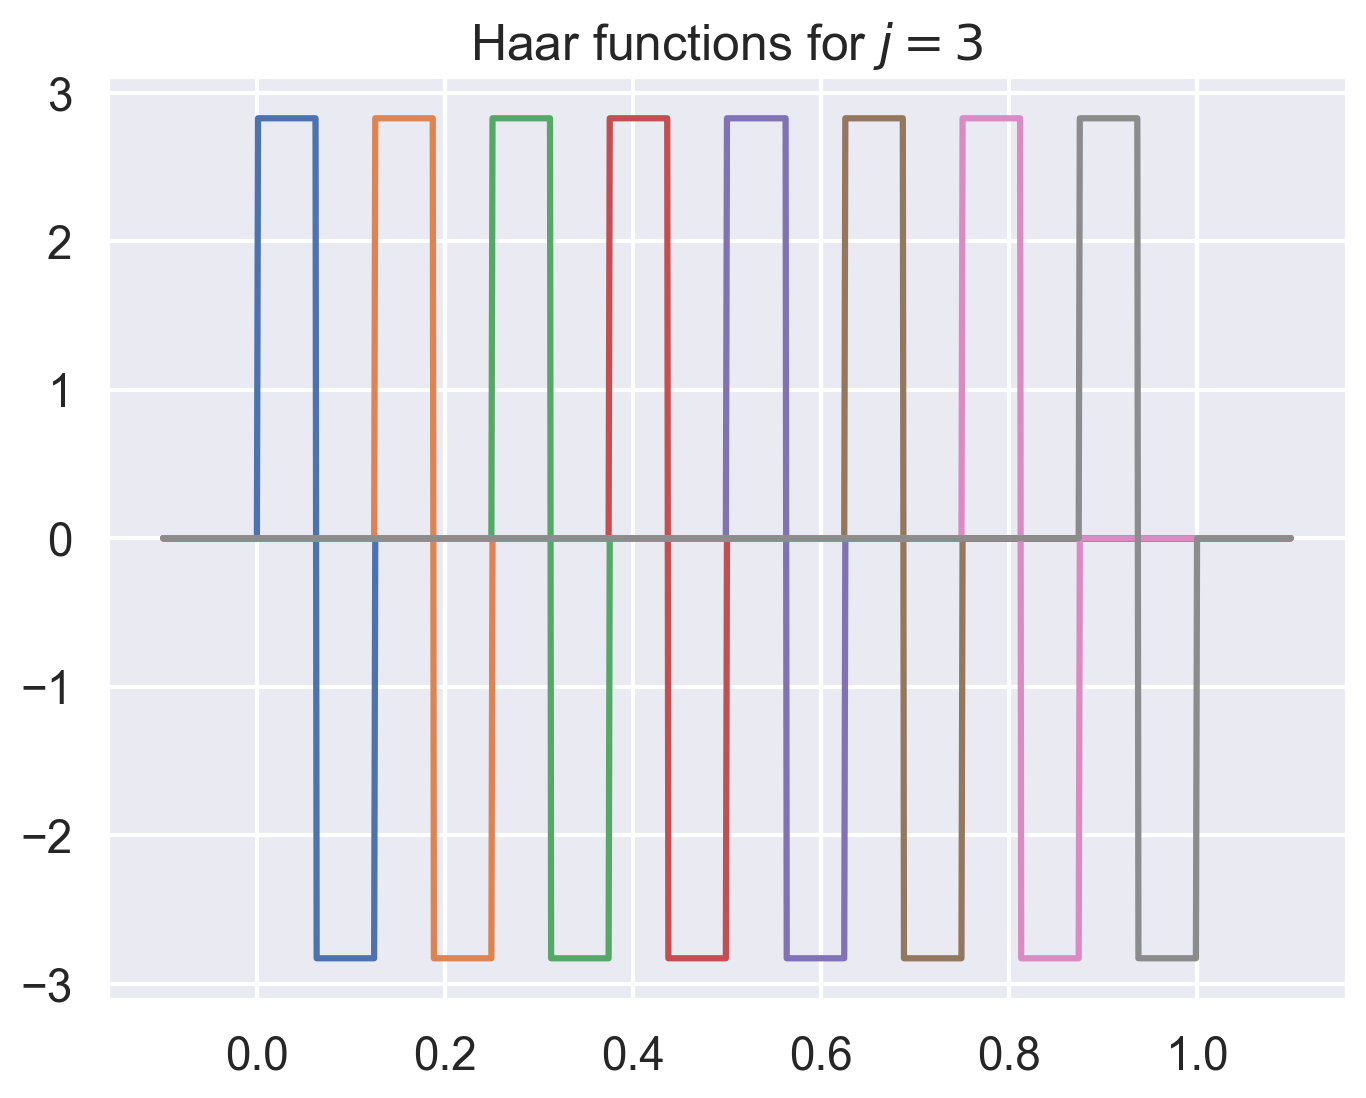

In [4]:
j = 3
tab_t = np.linspace(-0.1, 1.1, 1001)
haar_j = brownian.generate_haar_functions(j, tab_t)

fig, ax = plt.subplots()
for i in range(len(haar_j)):
    ax.plot(tab_t, haar_j[i], label=f"j={j}, k={i}")
ax.set_title(f"Haar functions for $j={j}$")
# ax.legend()
plt.show()

Plot Schauder functions $t \mapsto S_{2^j+k}(t)$ for $k=0,\ldots,2^j-1$
and $S_0(t)=t$.

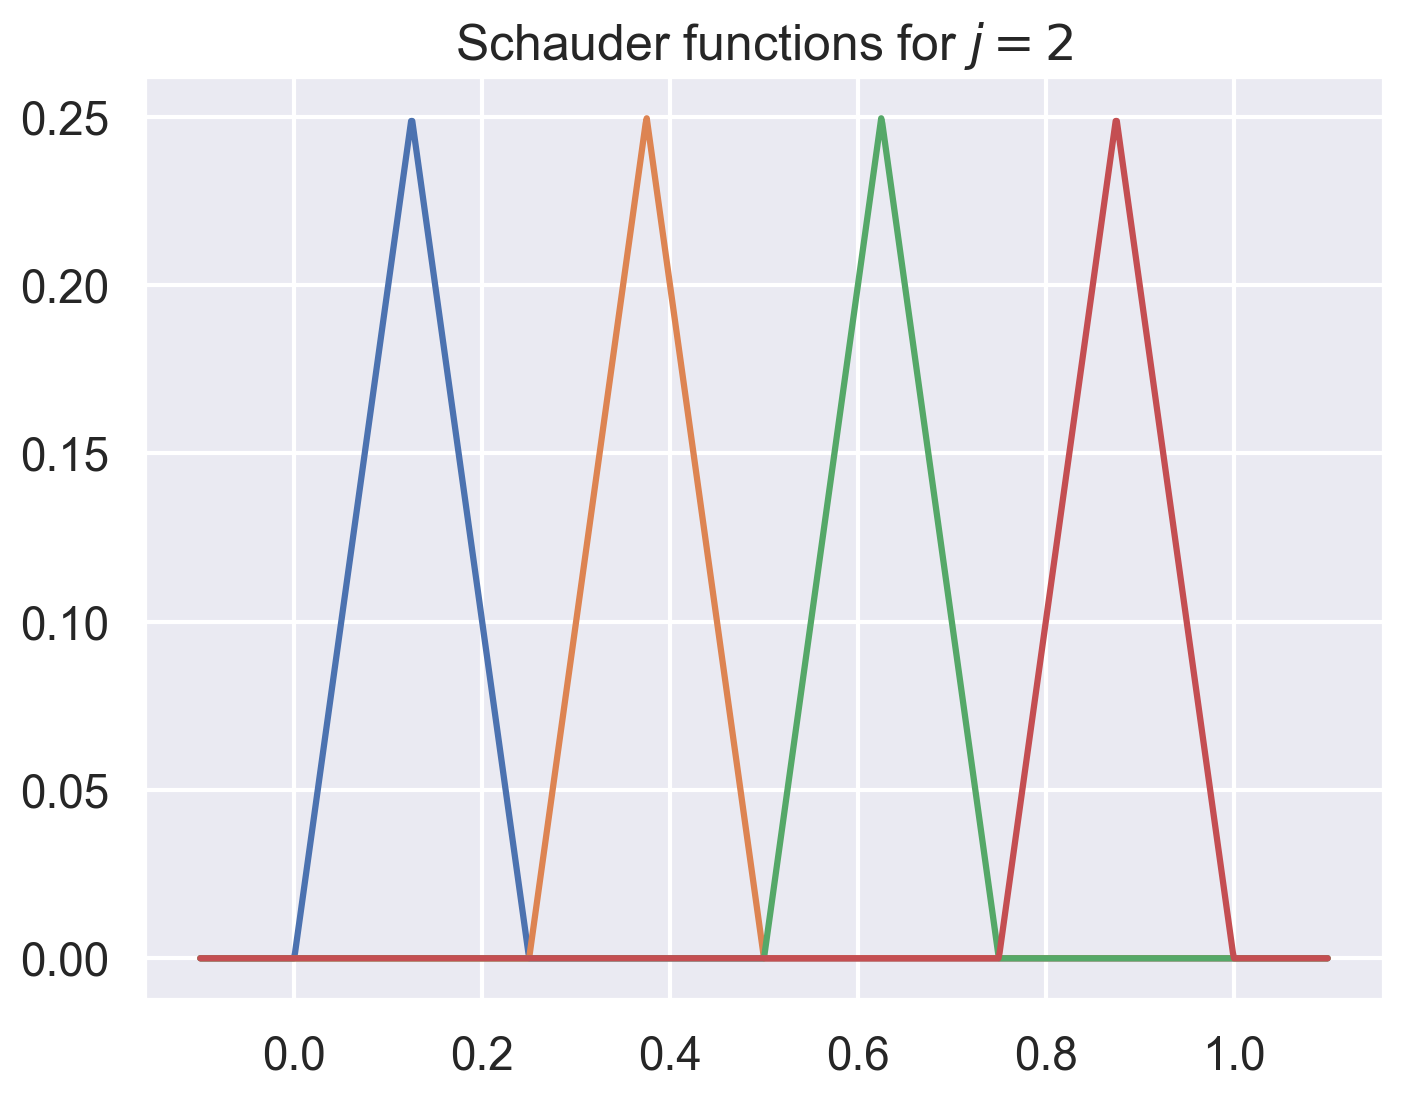

In [8]:
j = 2
tab_t = np.linspace(-0.1, 1.1, 1001)
schauder_j = brownian.generate_schauder_functions(j, tab_t)

fig, ax = plt.subplots()
for i in range(len(schauder_j)):
    ax.plot(tab_t, schauder_j[i], label=f"j={j}, k={i}")
ax.set_title(f"Schauder functions for $j={j}$")
# ax.legend()
plt.show()

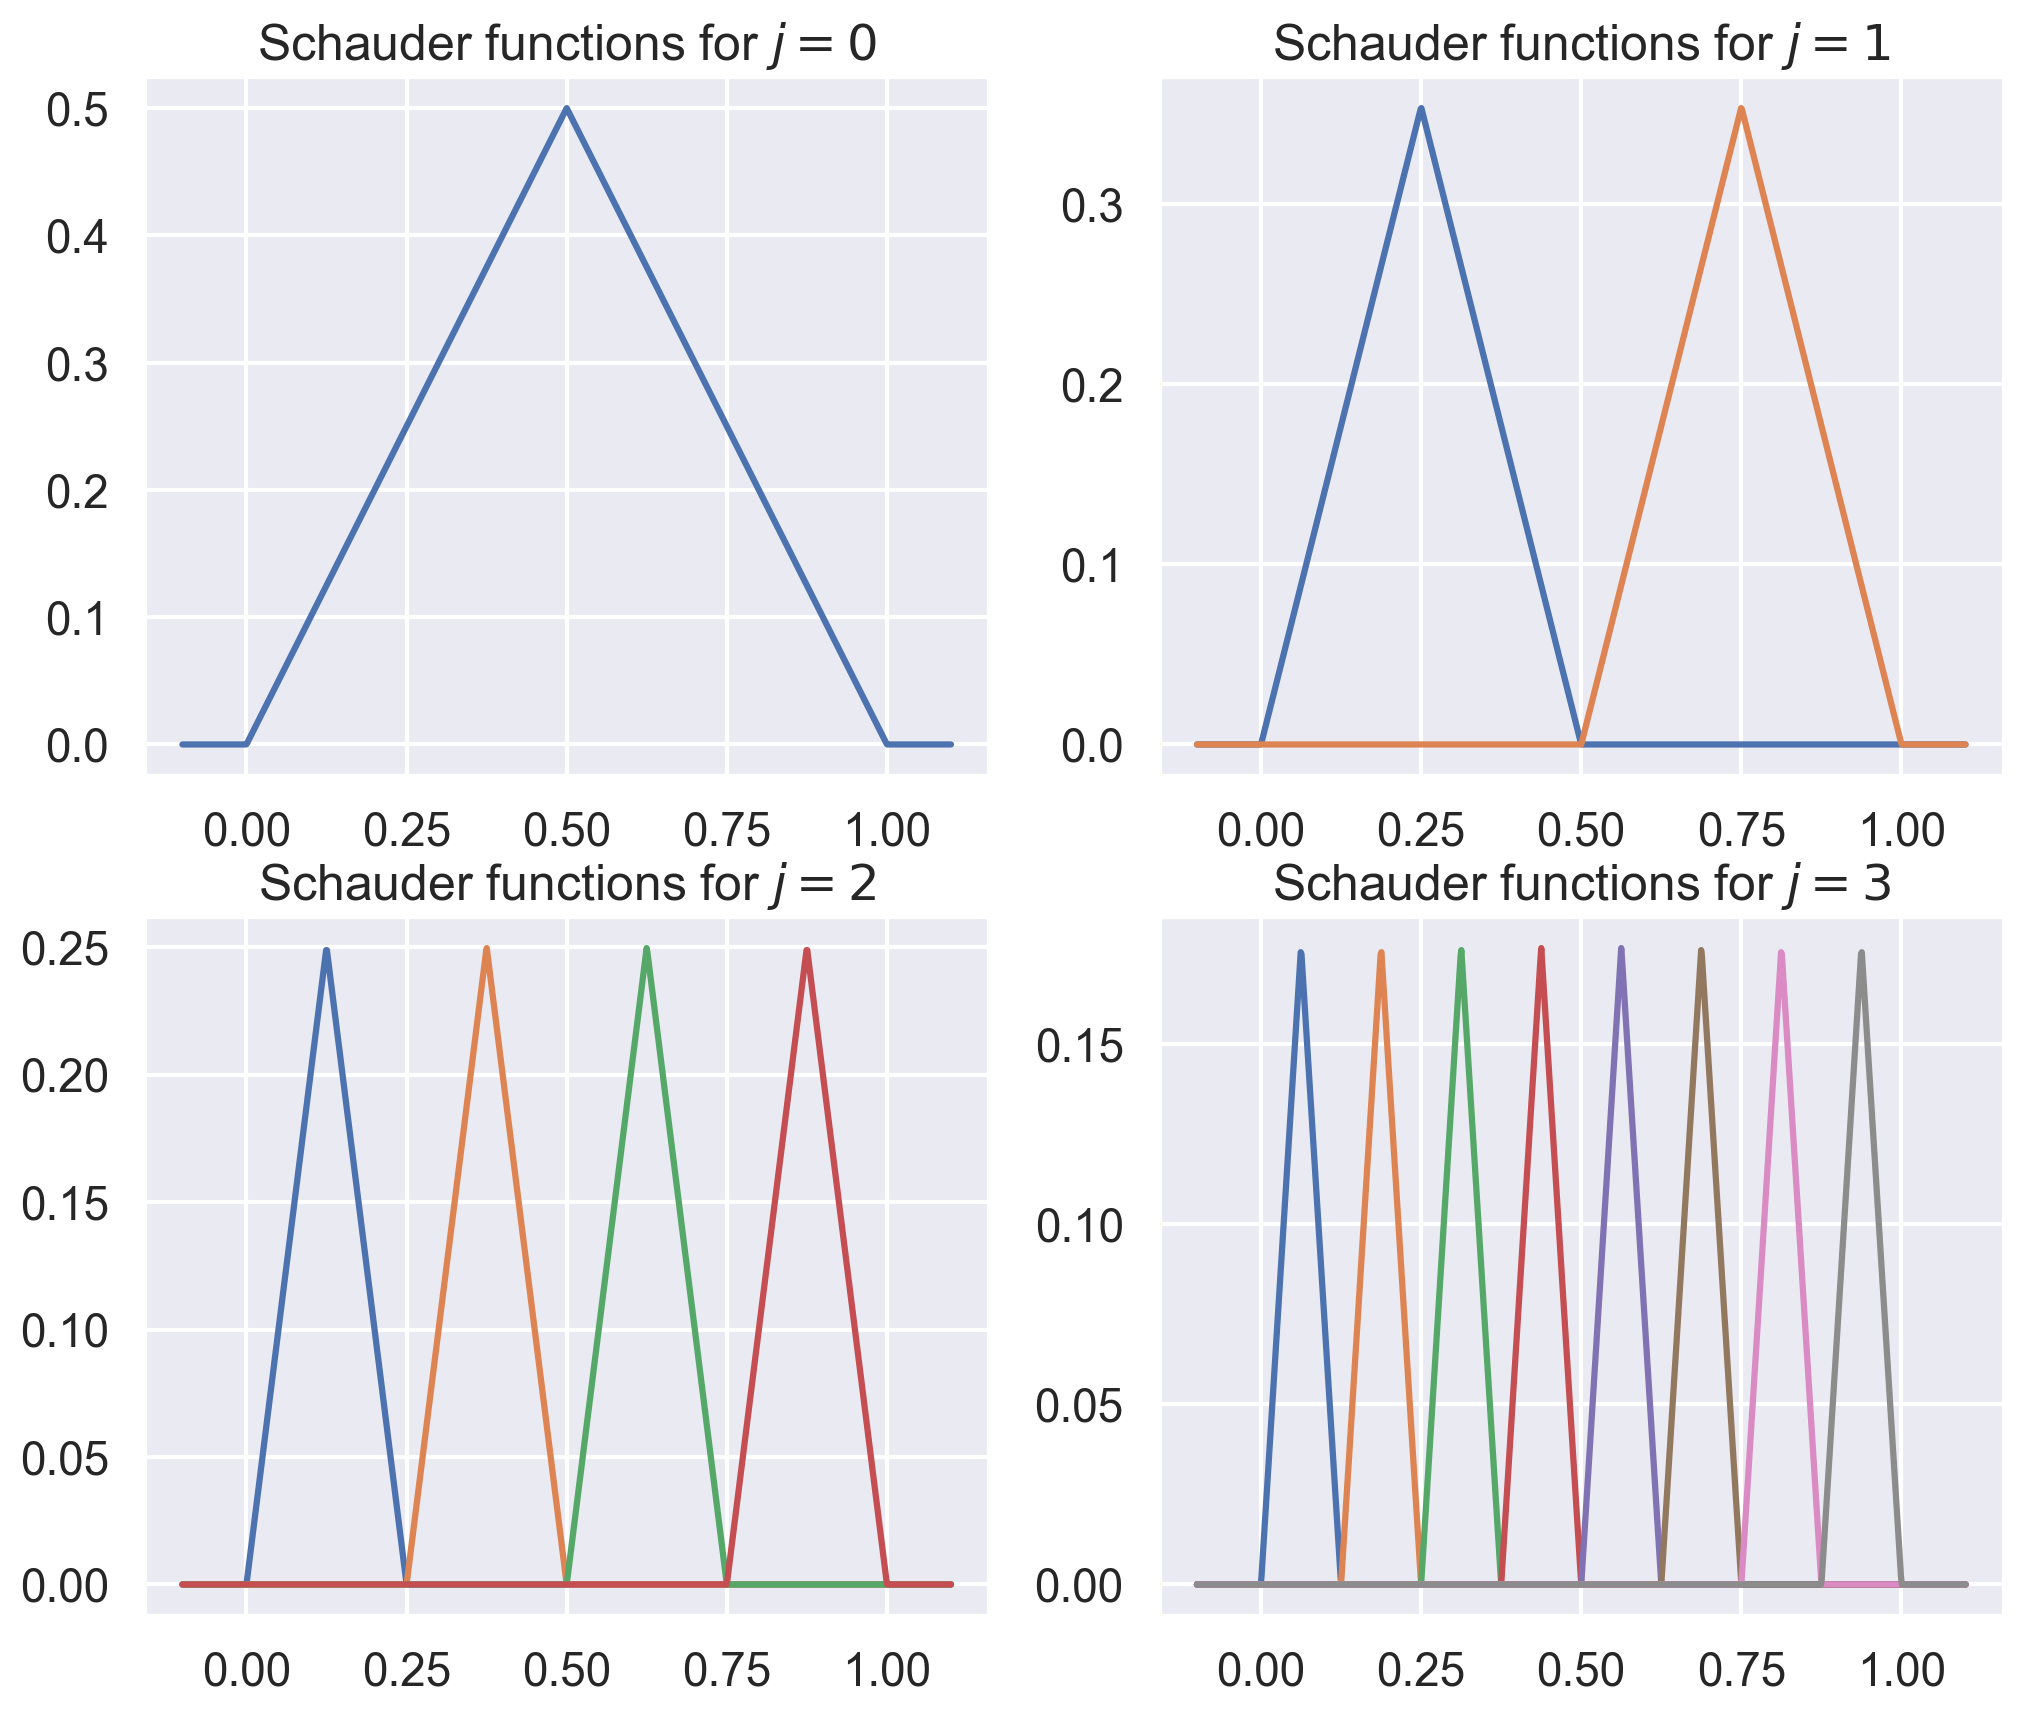

In [10]:
list_j = [0, 1, 2, 3]
tab_t = np.linspace(-0.1, 1.1, 1001)

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
for idx, j in enumerate(list_j):
    ax_j = ax[idx // 2, idx % 2]
    schauder_j = brownian.generate_schauder_functions(j, tab_t)
    ax_j.set_title(f"Schauder functions for $j={j}$")
    for i in range(len(schauder_j)):
        ax_j.plot(tab_t, schauder_j[i], label=f"j={j}, k={i}")
plt.show()

Fix $L \in \mathbb{N}$ and consider $N_L:=2^{L+1}$ independent standard normal 
random variables
$$
    \set{G_0,G_{2^j+k}}_{0 \le j \le L, \, 0 \le k \le 2^j-1}.
$$

As $L \to +\infty$, the process defined by
$$    
    W_t^{(L)} := G_{0} S_0(t) 
    + 
    \sum_{j=0}^{L} \sum_{k=0}^{2^{j}-1}
    S_{2^j+k} (t) \, G_{2^j+k}
$$
converges uniformly on $[0,1]$ to a Brownian 
motion $(W_{t})_{t\in[0,1]}$.

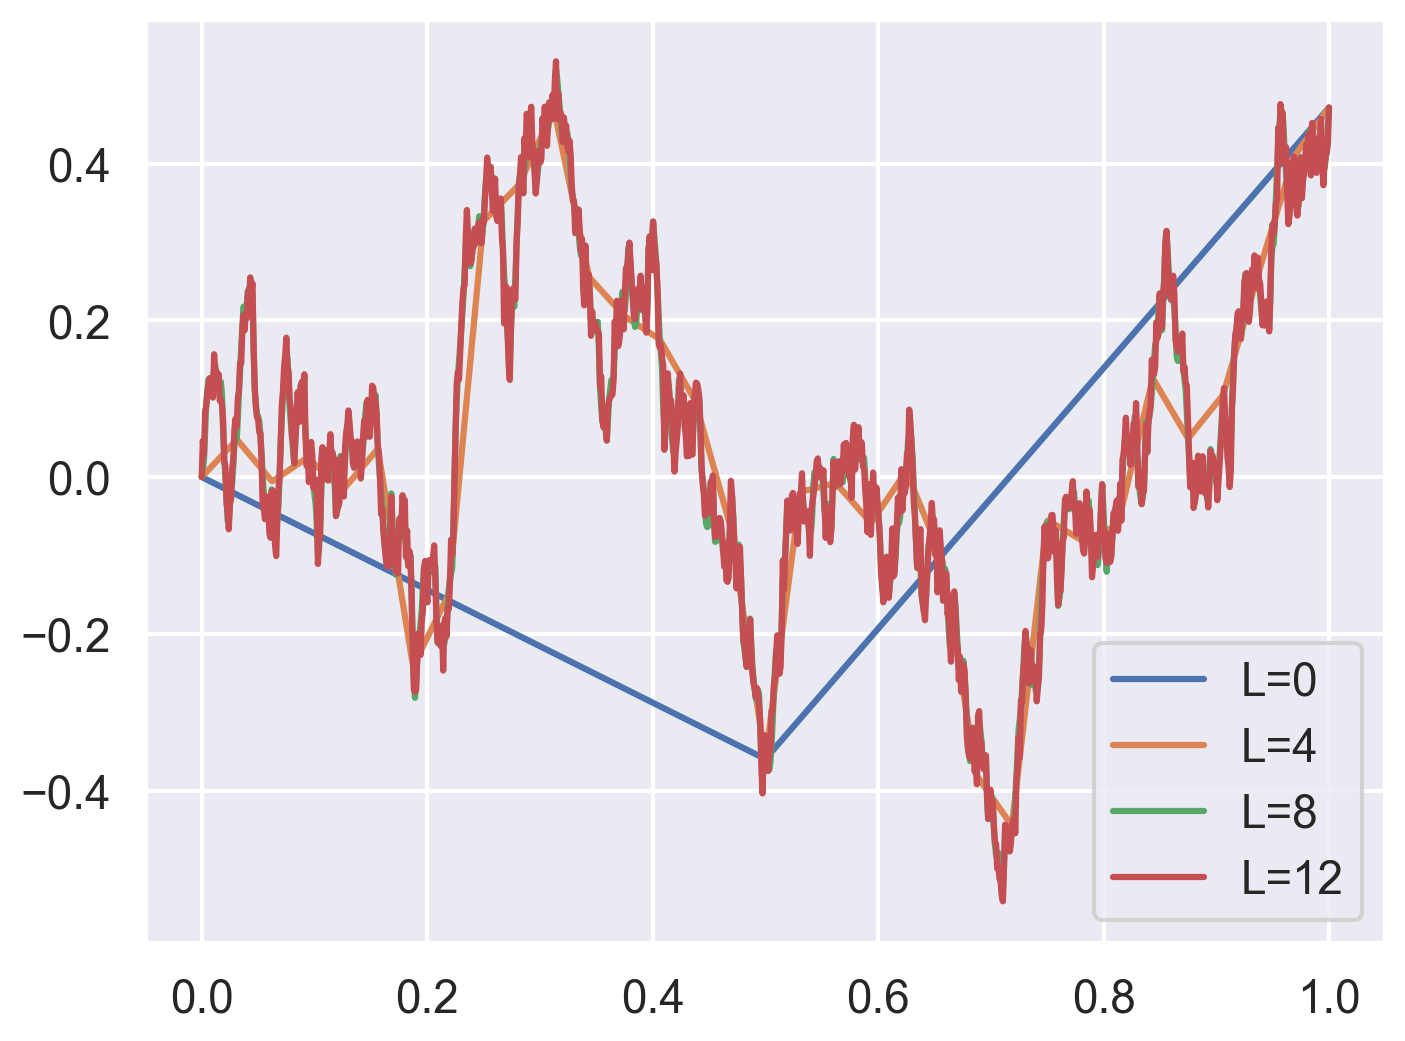

In [11]:
tab_t = np.linspace(0, 1, 1000)

fig, ax = plt.subplots()
for i in np.arange(0, 16, 4):
    ax.plot(
        tab_t,
        brownian.simulate_brownian_levy_construction(tab_t, L=i),
        "-",
        label=f"L={i}",
    )
ax.legend()
plt.show()

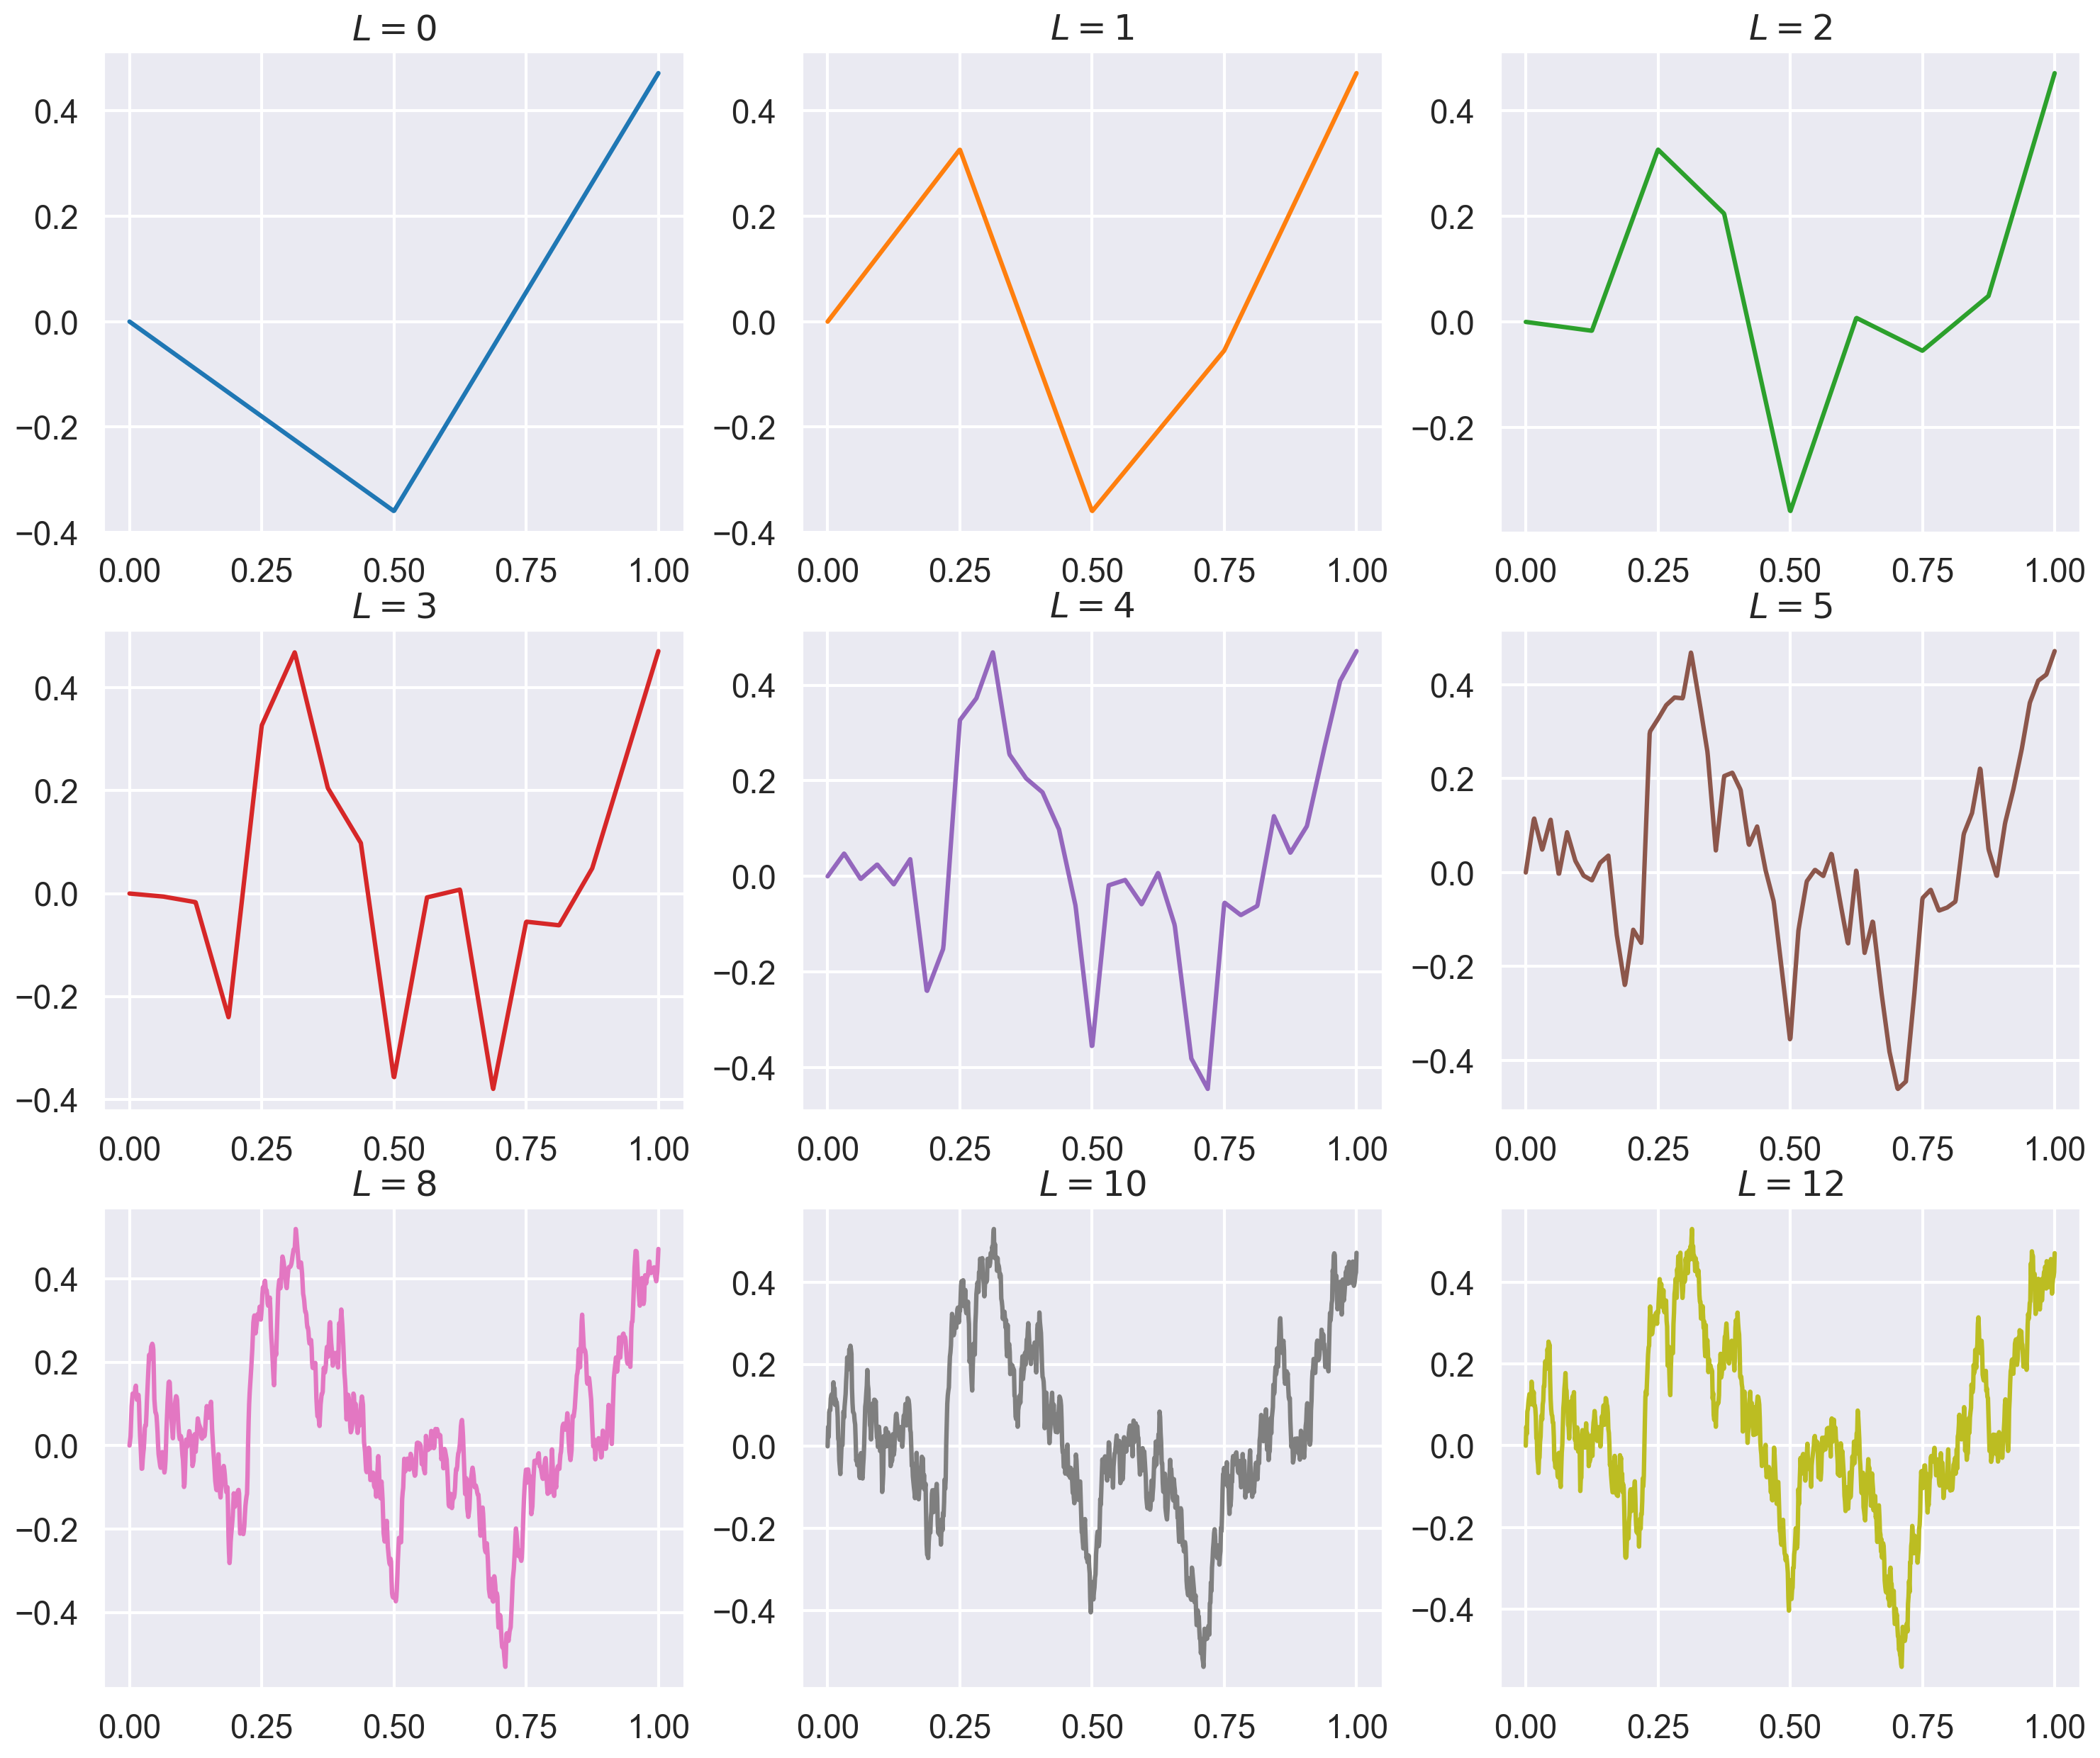

In [21]:
list_L = [0, 1, 2, 3, 4, 5, 8, 10, 12]
tab_t = np.linspace(0, 1, 1000)

fig, ax = plt.subplots(3, 3, figsize=(18, 15))
cmap = plt.get_cmap("tab10")  # categorical colormap with at least 10 distinct colors
for idx, L in enumerate(list_L):
    color = cmap(idx % cmap.N)
    ax_L = ax[idx // 3, idx % 3]
    ax_L.plot(
        tab_t,
        brownian.simulate_brownian_levy_construction(tab_t, L=L, seed=SEED),
        "-",
        color=color,
    )
    ax_L.set_title(f"$L={L}$")
plt.show()